In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Income Pension Data

In [84]:
u98_other_income =pd.read_csv('/Users/Mahdi/quera_ai/projects/project1/Iranian_HEIS/data/other_income_dataset/other_income_u98.csv')
r98_other_income =pd.read_csv('/Users/Mahdi/quera_ai/projects/project1/Iranian_HEIS/data/other_income_dataset/other_income_r98.csv')
u99_other_income =pd.read_csv('/Users/Mahdi/quera_ai/projects/project1/Iranian_HEIS/data/other_income_dataset/other_income_u99.csv')
r99_other_income =pd.read_csv('/Users/Mahdi/quera_ai/projects/project1/Iranian_HEIS/data/other_income_dataset/other_income_r99.csv')
u1400_other_income =pd.read_csv('/Users/Mahdi/quera_ai/projects/project1/Iranian_HEIS/data/other_income_dataset/other_income_u1400.csv')
r1400_other_income =pd.read_csv('/Users/Mahdi/quera_ai/projects/project1/Iranian_HEIS/data/other_income_dataset/other_income_r1400.csv')
u1401_other_income =pd.read_csv('/Users/Mahdi/quera_ai/projects/project1/Iranian_HEIS/data/other_income_dataset/other_income_u1401.csv')
r1401_other_income =pd.read_csv('/Users/Mahdi/quera_ai/projects/project1/Iranian_HEIS/data/other_income_dataset/other_income_r1401.csv')

In [85]:
def clean_data_pension(df):
    df = df.drop_duplicates(subset=['Address', 'member'], keep=False)
    df_clean = df[['Address', 'member', 'income_pension']]
    df_clean = df_clean.dropna(subset=['income_pension'])
    df_clean['income_pension'] = pd.to_numeric(df_clean['income_pension'], errors='coerce')
    df_clean = df_clean.groupby('Address')['income_pension'].sum().reset_index()
    return df_clean

In [86]:
u98_pension_income= clean_data_pension(u98_other_income)
r98_pension_income= clean_data_pension(r98_other_income)
u99_pension_income= clean_data_pension(u99_other_income)
r99_pension_income= clean_data_pension(r99_other_income)
u1400_pension_income= clean_data_pension(u1400_other_income)
r1400_pension_income= clean_data_pension(r1400_other_income)
u1401_pension_income= clean_data_pension(u1401_other_income)
r1401_pension_income= clean_data_pension(r1401_other_income)

In [87]:
r99_pension_income.describe()

,Address,income_pension
count,6.433000e+03,6.433000e+03
mean,2.158050e+10,1.097628e+08
std,1.007560e+09,1.759231e+08
min,2.000138e+10,0.000000e+00
25%,2.061446e+10,0.000000e+00
50%,2.150356e+10,0.000000e+00
75%,2.270367e+10,2.160000e+08
max,2.300671e+10,1.566000e+09


In [88]:
u98_pension_income['year'] = 1398
r98_pension_income['year'] = 1398
u99_pension_income['year'] = 1399
r99_pension_income['year'] = 1399
u1400_pension_income['year'] = 1400
r1400_pension_income['year'] = 1400
u1401_pension_income['year'] = 1401
r1401_pension_income['year'] = 1401
all_pension_income = pd.concat([u98_pension_income, r98_pension_income,
                                u99_pension_income, r99_pension_income,
                                u1400_pension_income, r1400_pension_income,
                                u1401_pension_income, r1401_pension_income])

all_pension_income.reset_index(drop=True, inplace=True)
all_pension_income.head()
all_pension_income.count()


Address           80006
income_pension    80006
year              80006
dtype: int64

In [89]:
all_pension_income['Address'].is_unique

False

In [90]:
family_pension_income = all_pension_income.groupby(['year', 'Address'])['income_pension'].sum().reset_index()
family_pension_income.rename(columns={'income_pension': 'family_pension_income'}, inplace=True)
family_pension_income.head()
family_pension_income.describe()

,year,Address,family_pension_income
count,80006.000000,8.000600e+04,8.000600e+04
mean,1399.941704,1.602158e+10,1.995141e+08
std,1.134811,5.030828e+09,3.352413e+08
min,1398.000000,1.000100e+10,0.000000e+00
25%,1399.000000,1.140218e+10,0.000000e+00
50%,1400.000000,1.280235e+10,0.000000e+00
75%,1401.000000,2.111252e+10,3.200000e+08
max,1401.000000,2.300671e+10,7.500000e+09


# Rent Data

In [91]:
u98_real_rent_cost = pd.read_excel('/Users/Mahdi/quera_ai/projects/project1/Project1_data/U98.xlsx', sheet_name='U98P3S04')
r98_real_rent_cost = pd.read_excel('/Users/Mahdi/quera_ai/projects/project1/Project1_data/R98.xlsx', sheet_name='R98P3S04')
u99_real_rent_cost = pd.read_excel('/Users/Mahdi/quera_ai/projects/project1/Project1_data/U99.xlsx', sheet_name='U99P3S04')
r99_real_rent_cost = pd.read_excel('/Users/Mahdi/quera_ai/projects/project1/Project1_data/R99.xlsx', sheet_name='R99P3S04')
u1400_real_rent_cost = pd.read_excel('/Users/Mahdi/quera_ai/projects/project1/Project1_data/U1400.xlsx', sheet_name='U1400P3S04')
r1400_real_rent_cost = pd.read_excel('/Users/Mahdi/quera_ai/projects/project1/Project1_data/R1400.xlsx', sheet_name='R1400P3S04')
u1401_real_rent_cost = pd.read_excel('/Users/Mahdi/quera_ai/projects/project1/Project1_data/U1401.xlsx', sheet_name='U1401P3S04')
r1401_real_rent_cost = pd.read_excel('/Users/Mahdi/quera_ai/projects/project1/Project1_data/R1401.xlsx', sheet_name='R1401P3S04')

In [92]:
u98_real_rent_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86250 entries, 0 to 86249
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Address    86250 non-null  int64 
 1   code       86250 non-null  int64 
 2   mortgage   3490 non-null   object
 3   purchased  72343 non-null  object
 4   value      86250 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 3.3+ MB


In [93]:
def clean_rent_data(data):
    clean_data = data[data['code'].astype(str).str.startswith('41')]
    clean_data = clean_data.groupby(['Address', 'code'])['value'].sum().reset_index()
    clean_data.rename(columns={'value': 'total_value'}, inplace=True)
    return clean_data


In [94]:
u98_real_rent_cost_clean = clean_rent_data(u98_real_rent_cost)
r98_real_rent_cost_clean = clean_rent_data(r98_real_rent_cost)
u99_real_rent_cost_clean = clean_rent_data(u99_real_rent_cost)
r99_real_rent_cost_clean = clean_rent_data(r99_real_rent_cost)
u1400_real_rent_cost_clean = clean_rent_data(u1400_real_rent_cost)
r1400_real_rent_cost_clean = clean_rent_data(r1400_real_rent_cost)
u1401_real_rent_cost_clean = clean_rent_data(u1401_real_rent_cost)
r1401_real_rent_cost_clean = clean_rent_data(r1401_real_rent_cost)

In [95]:
u98_real_rent_cost_clean['year'] = 1398
r98_real_rent_cost_clean['year'] = 1398
u99_real_rent_cost_clean['year'] = 1399
r99_real_rent_cost_clean['year'] = 1399
u1400_real_rent_cost_clean['year'] = 1400
r1400_real_rent_cost_clean['year'] = 1400
u1401_real_rent_cost_clean['year'] = 1401
r1401_real_rent_cost_clean['year'] = 1401

all_real_rent_cost = pd.concat([
    u98_real_rent_cost_clean, r98_real_rent_cost_clean,
    u99_real_rent_cost_clean, r99_real_rent_cost_clean,
    u1400_real_rent_cost_clean, r1400_real_rent_cost_clean,
    u1401_real_rent_cost_clean, r1401_real_rent_cost_clean
])

all_real_rent_cost.reset_index(drop=True, inplace=True)

print(all_real_rent_cost.count())
all_real_rent_cost.head()

Address        18010
code           18010
total_value    18010
year           18010
dtype: int64


,Address,code,total_value,year
0,10001000111,41111,20000000,1398
1,10001000317,41111,7000000,1398
2,10001000414,41111,8000000,1398
3,10001000517,41111,200000,1398
4,10001000520,41111,5200000,1398


In [96]:
all_real_rent_cost['Address'].is_unique

False

In [97]:
merged_data = pd.merge(all_real_rent_cost, all_pension_income, on=['Address', 'year'], how='inner')
merged_data.head()
result_data = merged_data[['Address', 'year', 'total_value', 'income_pension']]
result_data.rename(columns={'total_value': 'rent'}, inplace=True)
result_data.count()


/var/folders/xn/pc_68lms5455_7h8m5ncshrw0000gp/T/ipykernel_58580/1381594588.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_data.rename(columns={'total_value': 'rent'}, inplace=True)


Address           7636
year              7636
rent              7636
income_pension    7636
dtype: int64

In [98]:
duplicates = result_data[result_data.duplicated(subset=['Address', 'year'], keep=False)]
print(duplicates)

          Address  year      rent  income_pension
1063  10403051229  1399   7500000    1.140000e+08
1064  10403051229  1399   4000000    1.140000e+08
4428  10710091541  1401   2000000    1.200000e+09
4429  10710091541  1401  25000000    1.200000e+09


In [99]:
result_data_cleaned = result_data.drop_duplicates(subset=['Address', 'year'], keep=False)
result_data_cleaned.count()

Address           7632
year              7632
rent              7632
income_pension    7632
dtype: int64

In [100]:
result_data_cleaned.head()

,Address,year,rent,income_pension
0,10001000317,1398,7000000,271000000.0
1,10001001109,1398,8000000,336000000.0
2,10001002308,1398,6000000,300000000.0
3,10004004217,1398,4000000,214000000.0
4,10005004623,1398,2500000,151000000.0


In [101]:
result_data_cleaned['rent'] = result_data_cleaned['rent'] * 12
result_data_cleaned.head()

/var/folders/xn/pc_68lms5455_7h8m5ncshrw0000gp/T/ipykernel_58580/3045189410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_data_cleaned['rent'] = result_data_cleaned['rent'] * 12


,Address,year,rent,income_pension
0,10001000317,1398,84000000,271000000.0
1,10001001109,1398,96000000,336000000.0
2,10001002308,1398,72000000,300000000.0
3,10004004217,1398,48000000,214000000.0
4,10005004623,1398,30000000,151000000.0


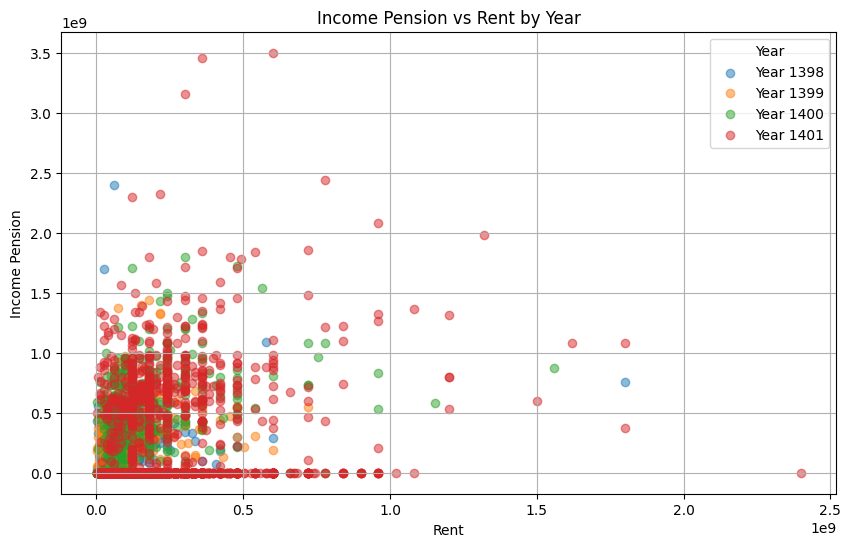

In [102]:
def plot_income_vs_rent(data):
    years = data['year'].unique() 
    
    plt.figure(figsize=(10, 6))
    
    for year in years:
        yearly_data = data[data['year'] == year]
        
        plt.scatter(yearly_data['rent'], yearly_data['income_pension'], alpha=0.5, label=f'Year {year}')
    
    plt.xlabel('Rent')
    plt.ylabel('Income Pension')
    plt.title('Income Pension vs Rent by Year')
    plt.legend(title='Year')
    plt.grid(True)
    plt.show()

plot_income_vs_rent(result_data_cleaned)


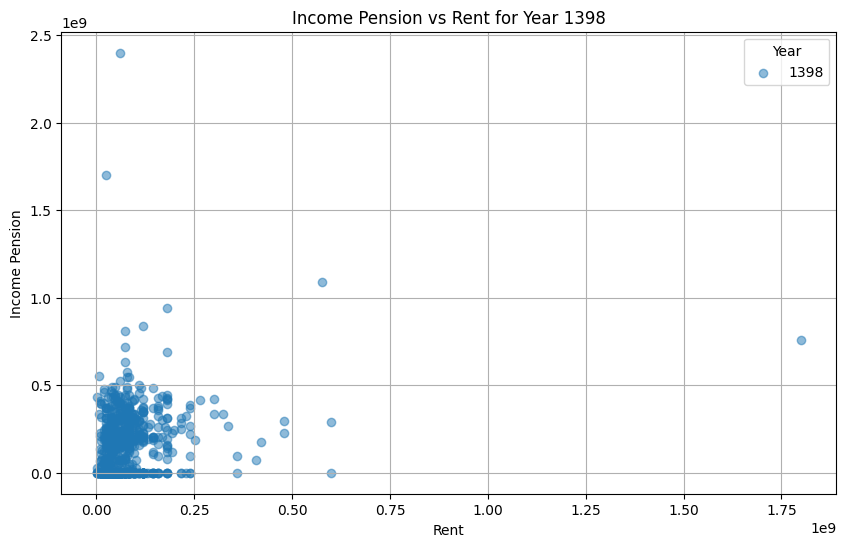

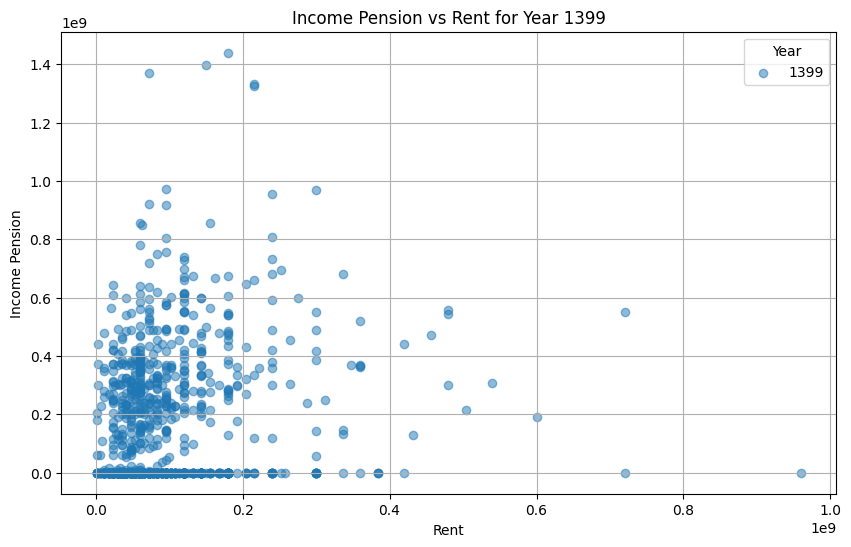

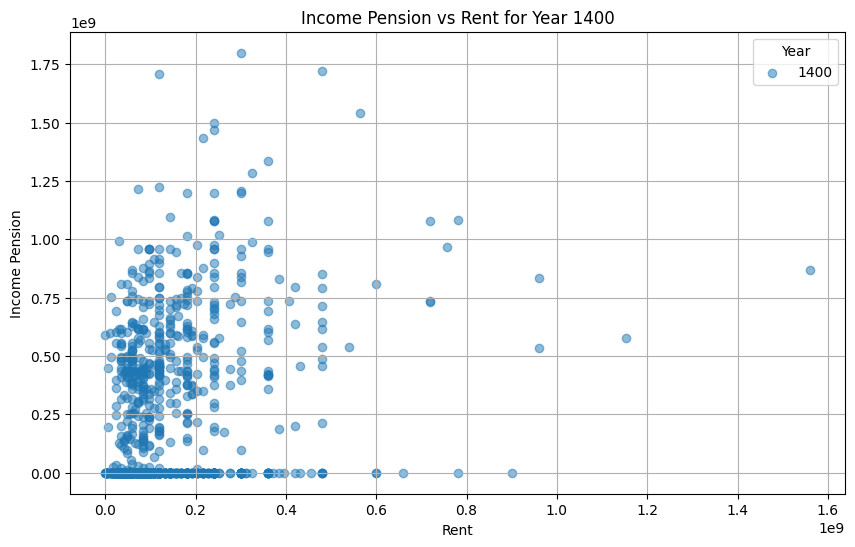

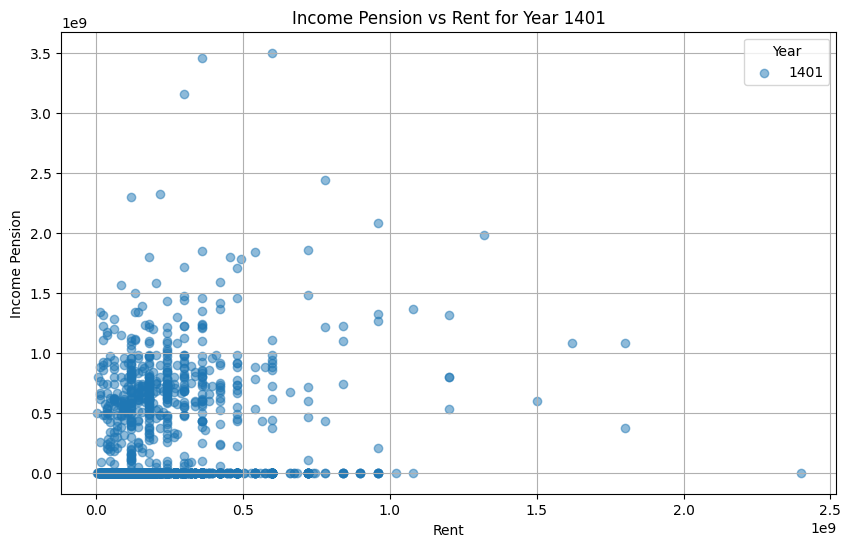

In [103]:
def plot_income_vs_rent_separate(data):
    years = data['year'].unique()

    for year in years:
        yearly_data = data[data['year'] == year]
        
        plt.figure(figsize=(10, 6))
        
        plt.scatter(yearly_data['rent'], yearly_data['income_pension'], alpha=0.5, label=f'{year}')
        
        plt.xlabel('Rent')
        plt.ylabel('Income Pension')
        plt.title(f'Income Pension vs Rent for Year {year}')
        plt.legend(title='Year')
        plt.grid(True)
        
        plt.show()

plot_income_vs_rent_separate(result_data_cleaned)


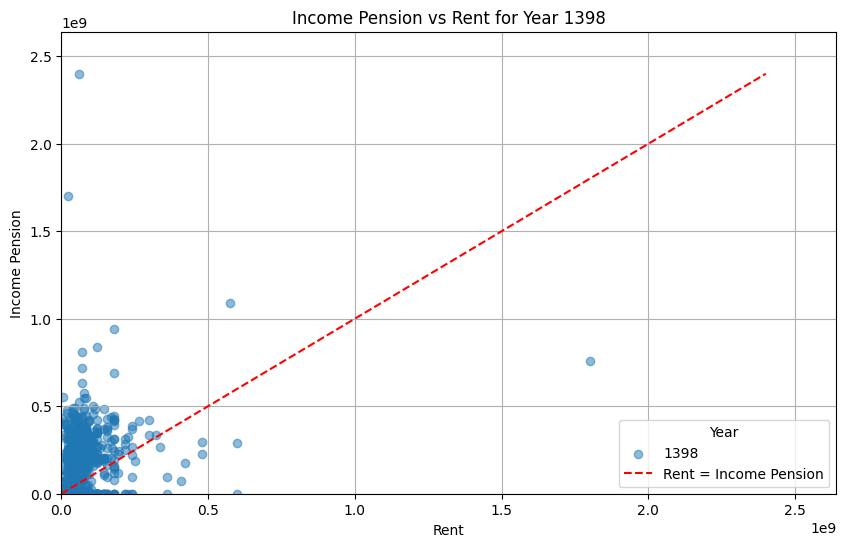

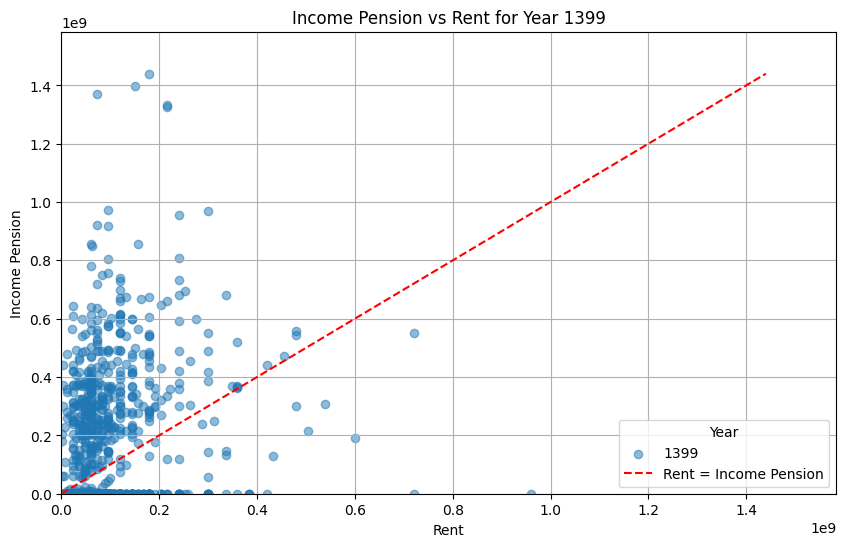

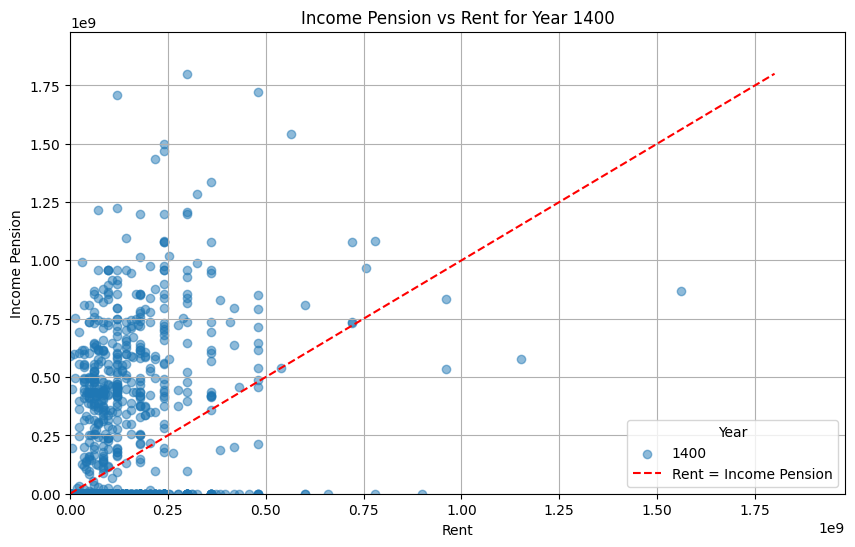

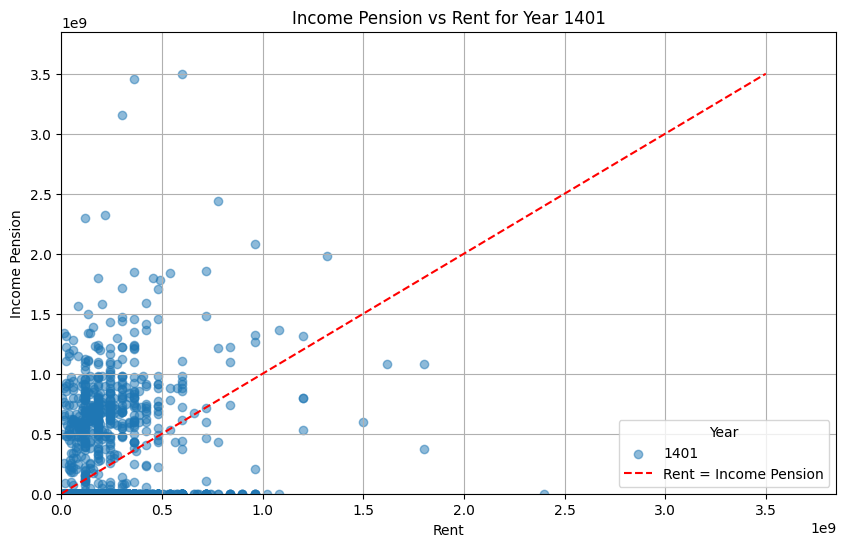

In [106]:
import numpy as np
import matplotlib.pyplot as plt

def plot_income_vs_rent_separate(data):
    years = data['year'].unique()

    for year in years:
        yearly_data = data[data['year'] == year]
        
        plt.figure(figsize=(10, 6))
        plt.scatter(yearly_data['rent'], yearly_data['income_pension'], alpha=0.5, label=f'{year}')
        
        max_value = max(yearly_data['rent'].max(), yearly_data['income_pension'].max())
        plt.plot([0, max_value], [0, max_value], linestyle='--', color='red', label='Rent = Income Pension')

        plt.xlabel('Rent')
        plt.ylabel('Income Pension')
        plt.title(f'Income Pension vs Rent for Year {year}')
        plt.legend(title='Year')
        plt.grid(True)
        
        plt.xlim(0, max_value * 1.1)
        plt.ylim(0, max_value * 1.1)
        plt.show()

plot_income_vs_rent_separate(result_data_cleaned)
